이전에 훈련한 모델을 버리고 다시 새로운 모델을 훈련하는 방식  
앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수 없을까?  
이런 식의 훈련 방식을 **점진적 학습** 또는 **확률적 경사 하강법(Stochastic Gradient Descent)**라고 부릅니다.

확률적 경사 하강법
경사 하강법은 경사를 따라 내려가는 방법을 의미함  
가장 가파른 경사를 따라 우너하는 지점에 도달하는 것이 목표  
가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다.  
경사 하강법으로 내려올 때 가장 가파른 길을 찾는 방법  
훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련세트를 사용하여 가장 가파른 길을 찾을 것  
전체 샘플을 사용하지 않으면서 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾기!  
훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 확률적 경사 하강법임  

확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에폭크epoch 라고 부릅니다.  
일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행합니다.  
여러개의 샘플을 사용해 경사 하강법을 수행하는 방법을 미니배치 경사 하강법minibatch gradient descent 라고 합니다.  

**손실함수(loss function)**
머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준임  
손실 함수의 값이 작을수록 좋음  
가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 합니다.  
우리가 다루는 많은 문제에 필요한 손실함수는 이미 정의 되어있음  
정확도를 손실함수로 사용할 수 있을까?  
기술적으로 손실함수는 미분가능해야 합니다.  
예측은 0 또는 1이지만 확률은 0~1사이의 어떤 값도 될 수 있음  

타깃이 양성클래스(1)일 경우
에측 x 정답(타깃)  
1번 0.9 x 1 -> -0.9 
2번 0.3 x 1 -> -0.3

으로 거리가 멀면 1번보다 2번이 높은 손실로 작용이 됨  

샘플 타깃이 0인 경우  
양성클래스 형식으로 한번 바꾸어주는 과정이 필요함  
확률이 0.2인 경우  
1-0.2= 0.8  
0.8 x 1 = -0.8  
로 낮은 손실을 적용 받음  

반대로 타깃이 0임에도 예측값이 0.8과 같은 1과 가까운 수가 나오는 경우  
1-0.9 = 0.1  
0.1 x 1 = -0.1과 같이 높은 손실을 야기함  

예측 확률에서 로그 함수를 적용하면 더 좋습니다. 예측 확률의 범위는 0~1사이인데  
로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 됩니다  


**타깃 = 1일 때**  
-> -log(예측확률)  

**타깃 = 0일때**  
-> -log(1 - 예측확률)  

위의 손실함수를 로지스틱 손실함수(logisitic loss function) 라고 한다.  
혹은 이진 크로스엔트로피 손실 함수(cross-entropy loss function)이라고 부른다.  
손실함수를 직접 계산하는 일 또한 드불고, 머신러닝 라이브러리가 처리해 주니까 걱정하 필요가 없다.  
하지만 손실함수가 무엇인지, 왜 정의를 해야 하는지 이해하는 것이 중요   

In [15]:
#확률적 경사 하강법을 사용한 분류모델 만들기
#SGDClassifier
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [16]:
#Species열은 타겟데이터 / 나머지 열은 입력데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [21]:
#train_test_split를 사용해 데이터를 훈련세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [22]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리
# 테스트 세트에도 학습한 통계 값으로 테스트 세트도 변환해주어야 함
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [25]:
# 훈련한 모델 sc를 추가 훈련할 때 / 모델을 이어 훈련할 때 partial_fit()을 사용함
# fit()메서드와 사용법이 같지만 호출할 때마다 1에포크씩 이어서 훈련이 가능함
# 메서드 후출후 훈련 세트와 테스트 세트 점수 확인해보기
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


아직 값이 낮지만 정확도가 조금 향상된 것을 볼 수 있다.  
무작정 많이 반복할 수는 없고 어떤 기준이 필요할 것  


**에포크와 과대/과소적합**

확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있습니다.  
에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습합니다. 산을 다 내려오지 못하고 훈련을 마치는 셈  
에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것  

훈련세트는 에포크의 증가에 꾸준히 증가하지만  
테스트세트는 일정수준 증가하다가 감소하게 됨 
그 지점이 모델이 과대적합되기 시작하는 곳임  
과대적합이 시작하기 전 훈련을 멈추는 것을 조기 종료early stopping이라고 함  
partial_fit()을 사용할 것

In [26]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [27]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))
#파이썬의 _는 특별한 변수임. 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용함 여기서는 0-299까지의 반복을 위하여 사용함

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


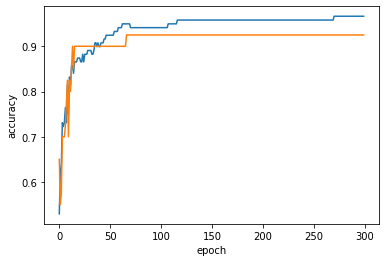

In [28]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [29]:
#잘 드러나진 않지만 100번째 이후에 점수가 조금씩 벌어지고 있음
#SGDClassifier의 반복횟수를 100에 맞추고 모델을 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [30]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


loss함수의 기본값은 hinge
힌지 손실 hinge손실은 서포트 벡터 머신 support vector machine이라 불리는  
다른 머신러닝 알고리즘을 위한 손실함수임  
힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해보도록 하기

In [31]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
